In [1]:
# Import required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
leads_df = pd.read_csv('Leads.csv')
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

## Data Cleaning

In [4]:
leads_df = leads_df.drop(['Prospect ID', 'Lead Number'], axis=1)

In [5]:
# replacing "Select" with nan
leads_df = leads_df.replace(to_replace='Select', value=np.nan)

In [6]:
leads_df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# finding null percentage in each column
def get_null_percentage():
    return round(100 * leads_df.isnull().sum()/leads_df.shape[0], 2)
null_counts = get_null_percentage()
null_counts

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [8]:
# finding columns to drop where null percenatge is more than 45
fields_to_drop = null_counts[null_counts > 45]
fields_to_drop

How did you hear about X Education    78.46
Lead Quality                          51.59
Lead Profile                          74.19
Asymmetrique Activity Index           45.65
Asymmetrique Profile Index            45.65
Asymmetrique Activity Score           45.65
Asymmetrique Profile Score            45.65
dtype: float64

In [9]:
# droping cloumns with high null percentage
leads_df = leads_df.drop(fields_to_drop.index, axis=1)
leads_df.shape

(9240, 28)

In [10]:
# find list of categorical columns
cat_columns = leads_df.select_dtypes(['object']).columns
cat_columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [11]:
# Find percenatge count of values in each column
def print_per_count():
    for col in cat_columns:
        print(f'**{col}**')
        print(round(leads_df[col].value_counts(normalize=True)*100,2))
        print()

print_per_count()

**Lead Origin**
Landing Page Submission    52.88
API                        38.74
Lead Add Form               7.77
Lead Import                 0.60
Quick Add Form              0.01
Name: Lead Origin, dtype: float64

**Lead Source**
Google               31.16
Direct Traffic       27.63
Olark Chat           19.07
Organic Search       12.54
Reference             5.80
Welingak Website      1.54
Referral Sites        1.36
Facebook              0.60
bing                  0.07
google                0.05
Click2call            0.04
Press_Release         0.02
Live Chat             0.02
Social Media          0.02
NC_EDM                0.01
welearnblog_Home      0.01
blog                  0.01
WeLearn               0.01
testone               0.01
Pay per Click Ads     0.01
youtubechannel        0.01
Name: Lead Source, dtype: float64

**Do Not Email**
No     92.06
Yes     7.94
Name: Do Not Email, dtype: float64

**Do Not Call**
No     99.98
Yes     0.02
Name: Do Not Call, dtype: float64

**Last Act

In [12]:
def find_skwed_cols():
    skwed_cols = []
    for col in cat_columns:
        per_count = round(leads_df[col].value_counts(normalize=True)*100,2)
        if(per_count[0] >= 99):
            skwed_cols.append(col)
    return skwed_cols

skwed_cols = find_skwed_cols()
skwed_cols

['Do Not Call',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [13]:
# drop highly skwed columns
leads_df = leads_df.drop(skwed_cols, axis=1)
leads_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [14]:
# function to replace all the values which have less percentage count less than provided percentage with value 'Others'
def replace_with_other(col, per):
    temp = round(leads_df[col].value_counts(normalize=True)*100,2)
    temp = temp[temp < per]
    leads_df[col] = leads_df[col].apply(lambda x: 'Others' if x in temp.index else x)

In [15]:
replace_with_other('Lead Origin', 10)
replace_with_other('Lead Source', 10)
replace_with_other('Last Activity', 5)
replace_with_other('Country', 5)
replace_with_other('What is your current occupation', 5)
replace_with_other('Tags', 8)
replace_with_other('Last Notable Activity', 5)

In [16]:
get_null_percentage()

Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Country                                   26.63
Specialization                            36.58
What is your current occupation           29.11
Tags                                      36.29
City                                      39.71
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [17]:
leads_df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,0.385390,3.445238,487.698268,2.362820
std,0.486714,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


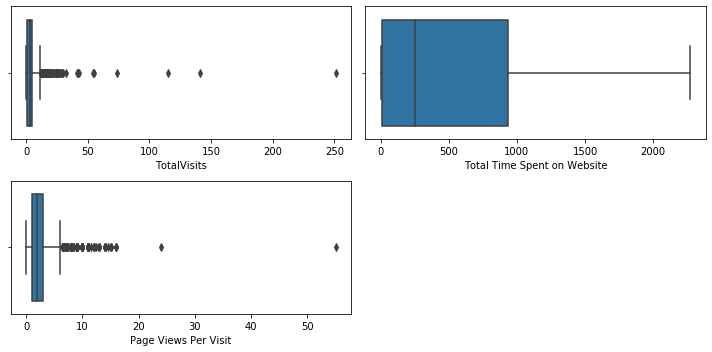

In [18]:
plt.figure(figsize=(10,5))
num_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
i=1
for col in num_cols:
    plt.subplot(2,2,i)
    sns.boxplot(leads_df[col])
    i = i+1
plt.tight_layout()
plt.show()

#### Imputation

In [19]:
def impute_with_median(col):
    leads_df[col] = leads_df[col].fillna(leads_df[col].median())

In [20]:
impute_with_median('TotalVisits')
impute_with_median('Total Time Spent on Website')
impute_with_median('Page Views Per Visit')

In [21]:
leads_df = leads_df[~leads_df['Lead Source'].isnull()]

In [22]:
get_null_percentage()

Lead Origin                                0.00
Lead Source                                0.00
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       0.00
Last Activity                              1.10
Country                                   26.36
Specialization                            36.42
What is your current occupation           29.23
Tags                                      36.31
City                                      39.53
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [23]:
#Dropping City and Country as country has more values for India and will make the model bias
#Similarly City is not providing any information clearly from Business Perspective
leads_df = leads_df.drop(['City','Country'], axis=1)

In [24]:
leads_df['A free copy of Mastering The Interview'].value_counts()

No     6316
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [25]:
# converting Yes to 1 and No to 0
leads_df['A free copy of Mastering The Interview'] = leads_df['A free copy of Mastering The Interview'].map({'Yes':1, 'No':0})

### Dummy Variables

In [26]:
leads_df.select_dtypes(['object']).columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'Last Notable Activity'],
      dtype='object')

In [27]:
#rem_cat_cols = leads_df.select_dtypes(['object']).columns

#for col in rem_cat_cols:
#    dummy = pd.get_dummies(leads_df[col], prefix=col, drop_first=True)
#    leads_df = pd.concat([leads_df, dummy], axis=1)
    
#leads_df = leads_df.drop(rem_cat_cols, axis=1)
#leads_df.head()

In [28]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'Lead Origin'
lo = pd.get_dummies(leads_df['Lead Origin'], prefix='Lead Origin')
# Dropping Lead Origin_Others column
lo1 = lo.drop(['Lead Origin_Others'], 1)
#Adding the results to the master dataframe
leads_df = pd.concat([leads_df, lo1], axis=1)

# Creating dummy variables for the variable 'Lead Source'.
ls = pd.get_dummies(leads_df['Lead Source'], prefix='Lead Source')
ls1 = ls.drop(['Lead Source_Others'], 1)
# Adding the results to the master dataframe
leads_df = pd.concat([leads_df,ls1], axis=1)

# Creating dummy variables for the variable 'Do Not Email'.
dne = pd.get_dummies(leads_df['Do Not Email'], prefix='Do Not Email')
dne1 = dne.drop(['Do Not Email_No'], 1)
# Adding the results to the master dataframe
leads_df = pd.concat([leads_df,dne1], axis=1)

# Creating dummy variables for the variable 'Last Activity'. 
la = pd.get_dummies(leads_df['Last Activity'], prefix='Last Activity')
la1 = la.drop(['Last Activity_Others'], 1)
# Adding the results to the master dataframe
leads_df = pd.concat([leads_df,la1], axis=1)

# Creating dummy variables for the variable 'Specialization'.
sp =pd.get_dummies(leads_df['Specialization'], prefix='Specialization')
sp1 = sp.drop(['Specialization_Services Excellence'], 1)
# Adding the results to the master dataframe
leads_df = pd.concat([leads_df,sp1], axis=1)

# Creating dummy variables for the variable 'What is your current occupation'. 
oc = pd.get_dummies(leads_df['What is your current occupation'], prefix='Occupation')
oc1 = oc.drop(['Occupation_Others'], 1)
# Adding the results to the master dataframe
leads_df = pd.concat([leads_df,oc1], axis=1)

# Creating dummy variables for the variable 'Tags'.
tg =pd.get_dummies(leads_df['Tags'], prefix='Tags')
tg1 = tg.drop(['Tags_Others'], 1)
# Adding the results to the master dataframe
leads_df = pd.concat([leads_df,tg1], axis=1)

# Creating dummy variables for the variable 'Last Notable Activity'.
lna =pd.get_dummies(leads_df['Last Notable Activity'], prefix='Last Notable Activity')
lna1 = lna.drop(['Last Notable Activity_Others'], 1)
# Adding the results to the master dataframe
leads_df = pd.concat([leads_df,lna1], axis=1)

In [29]:
#Drop orignal columns
cols_to_drop1 = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity','Specialization', 'What is your current occupation', 'Tags',
       'Last Notable Activity']

In [30]:
leads_df = leads_df.drop(cols_to_drop1, axis = 1)
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9204 entries, 0 to 9239
Data columns (total 41 columns):
Converted                                           9204 non-null int64
TotalVisits                                         9204 non-null float64
Total Time Spent on Website                         9204 non-null int64
Page Views Per Visit                                9204 non-null float64
A free copy of Mastering The Interview              9204 non-null int64
Lead Origin_API                                     9204 non-null uint8
Lead Origin_Landing Page Submission                 9204 non-null uint8
Lead Source_Direct Traffic                          9204 non-null uint8
Lead Source_Google                                  9204 non-null uint8
Lead Source_Olark Chat                              9204 non-null uint8
Lead Source_Organic Search                          9204 non-null uint8
Do Not Email_Yes                                    9204 non-null uint8
Last Activity_Email Opene

### Test-Train Split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# Putting features to X
X = leads_df.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Unemployed,Occupation_Working Professional,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,1,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
1,5.0,674,2.5,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
2,2.0,1532,2.0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,1.0,305,1.0,0,0,1,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,2.0,1428,1.0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0


In [33]:
#Putting target to y
y = leads_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

### Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].head()

C:\Users\Mohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Mohit\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,TotalVisits,Total Time Spent on Website,Page Views Per Visit
2835,-0.092199,1.892235,0.287109
3088,-0.092199,-0.469942,0.287109
8413,0.308979,1.919830,1.210231
5015,-0.092199,1.459905,0.287109
5166,-0.693965,-0.896752,-1.097575


In [37]:
# checking conversion rate
round(100 * sum(leads_df['Converted'])/leads_df.shape[0],2)

38.37

We have almost 38% conversion rate

### Looking at Correlations

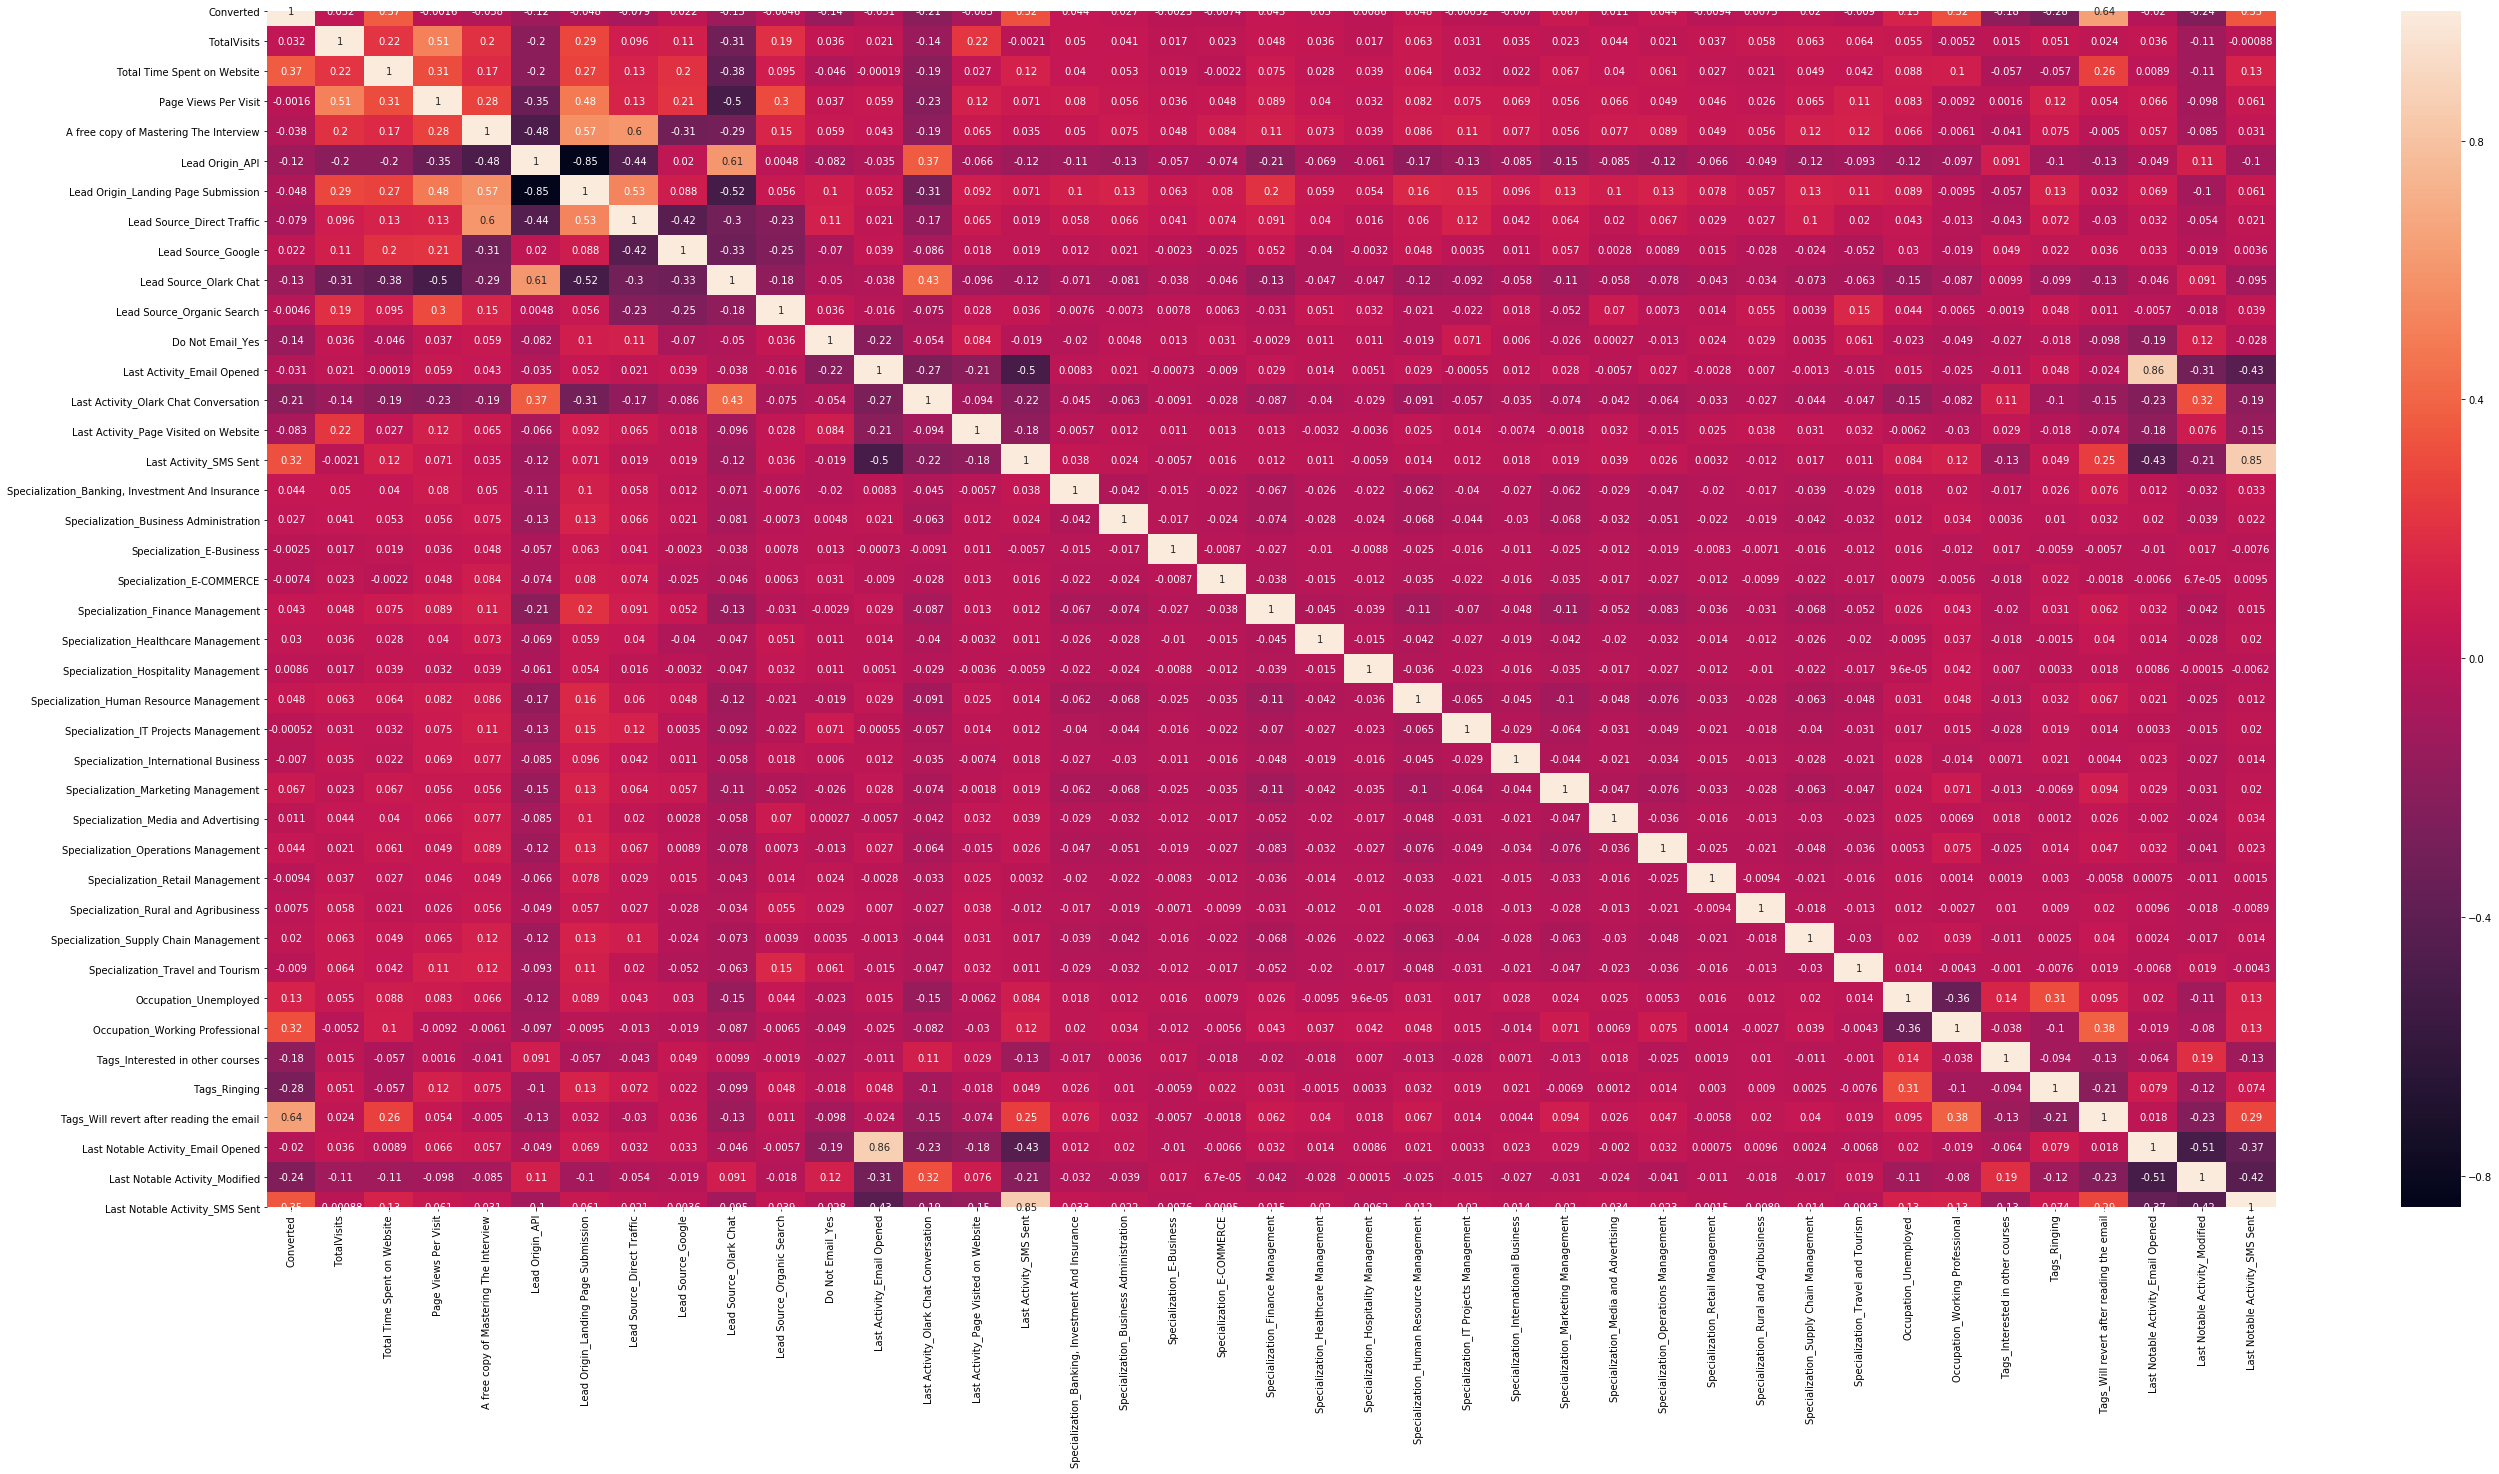

In [38]:
plt.figure(figsize=(45,22))
sns.heatmap(leads_df.corr(), annot=True)
plt.show()

In [39]:
cols_to_drop = ['Lead Origin_API', 'Last Activity_SMS Sent', 'Last Activity_Olark Chat Conversation']
X_test = X_test.drop(cols_to_drop, axis = 1)
X_train = X_train.drop(cols_to_drop, axis=1)

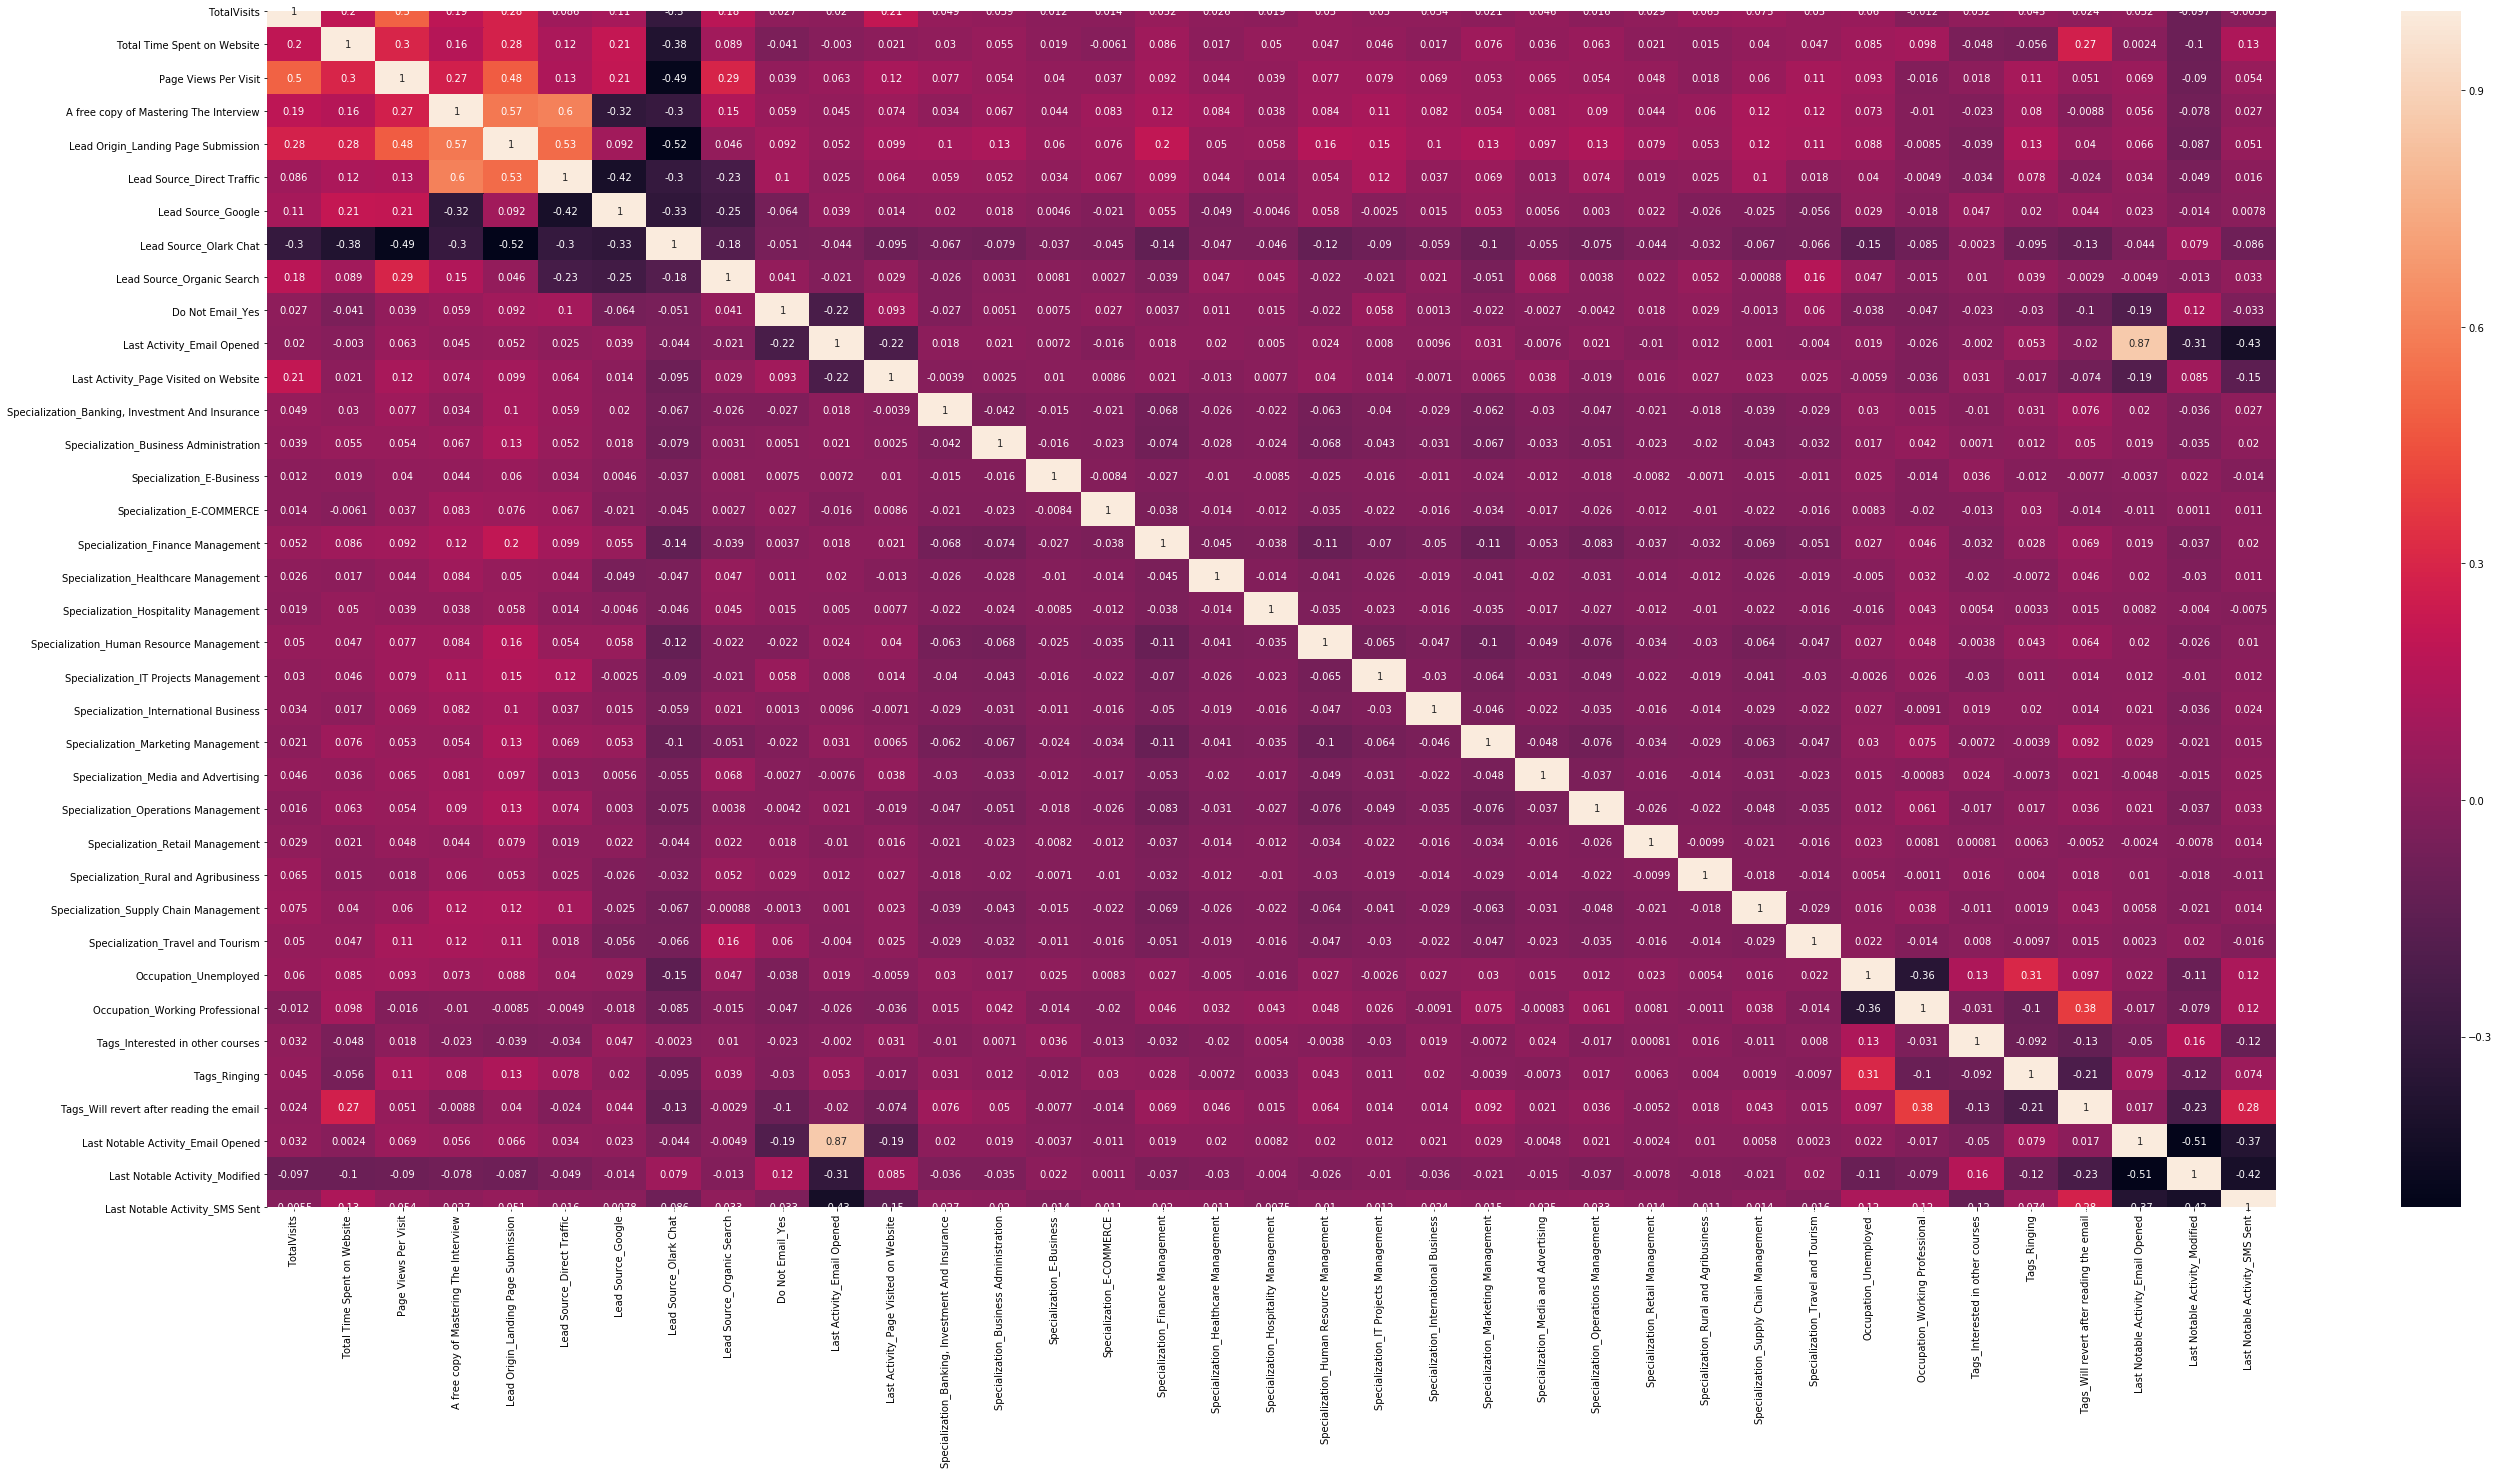

In [40]:
plt.figure(figsize=(45,22))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

### Model Building

In [41]:
import statsmodels.api as sm

In [42]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())
logm1.fit().summary()

C:\Users\Mohit\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6404
Model Family:                Binomial   Df Model:                           37
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1698.2
Date:                Sun, 19 Apr 2020   Deviance:                       3396.4
Time:                        21:21:26   Pearson chi2:                 9.74e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -0.1590      0.234     -0.679      0.497      -0.618       0.300
TotalVisits                                          0.1804      0.055      3.254      0.001       0.072       0.289
Total Time Spent on Website                          1.0869      0.053     20.493      0.000       0.983       1.191
Page Views Per Visit                                -0.3331      0.074     -4.489      0.000      -0.479      -0.188
A free copy of Mastering The Interview               0.1086      0.146      0.743      0.458      -0.178       0.395
Lead Origin_Landing Page Submission                 -0.4992      0.181     -2.760      0.006      -0.854      -0.145
Lead Source_Direct Traffic                          -2.6002      0.218    -11.925      0.000      -3.028      -2.173
Lead Source_Google                                  -2.2327      0.183    -12.184      0.000      -2.592      -1.873
Lead Source_Olark Chat                              -1.6483      0.173     -9.548      0.000      -1.987      -1.310
Lead Source_Organic Search                          -2.3009      0.218    -10.571      0.000      -2.727      -1.874
Do Not Email_Yes                                    -1.2521      0.212     -5.898      0.000      -1.668      -0.836
Last Activity_Email Opened                           0.9186      0.174      5.275      0.000       0.577       1.260
Last Activity_Page Visited on Website               -0.1592      0.207     -0.767      0.443      -0.566       0.247
Specialization_Banking, Investment And Insurance     0.6764      0.293      2.308      0.021       0.102       1.251
Specialization_Business Administration               0.3156      0.270      1.168      0.243      -0.214       0.845
Specialization_E-Business                            0.4781      0.552      0.866      0.387      -0.604       1.560
Specialization_E-COMMERCE                            0.2785      0.434      0.642      0.521      -0.571       1.128
Specialization_Finance Management                    0.3278      0.210      1.563      0.118      -0.083       0.739
Specialization_Healthcare Management                 0.1625      0.374      0.434      0.664      -0.571       0.896
Specialization_Hospitality Management                0.0273      0.443      0.062      0.951      -0.841       0.895
Specialization_Human Resource Management             0.2044      0.218      0.939      0.348      -0.222       0.631
Specialization_IT Projects Management                0.3213      0.286      1.123      0.261      -0.239       0.882
Specialization_International Business                0.0706      0.375      0.188      0.851      -0.665       0.806
Specialization_Marketing Management      

### Step 8: Feature Selection Using RFE

In [43]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [44]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 12)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

C:\Users\Mohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [45]:
rfe.support_

array([False,  True, False, False, False,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True, False, False,
        True])

In [46]:
#chech RFE ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 17),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 7),
 ('A free copy of Mastering The Interview', False, 21),
 ('Lead Origin_Landing Page Submission', False, 3),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Email Opened', False, 2),
 ('Last Activity_Page Visited on Website', False, 18),
 ('Specialization_Banking, Investment And Insurance', False, 4),
 ('Specialization_Business Administration', False, 11),
 ('Specialization_E-Business', False, 8),
 ('Specialization_E-COMMERCE', False, 13),
 ('Specialization_Finance Management', False, 9),
 ('Specialization_Healthcare Management', False, 19),
 ('Specialization_Hospitality Management', False, 26),
 ('Specialization_Human Resource Management', False, 14),
 ('Specialization_IT Projects Management', False, 12),
 ('Specialization_I

In [47]:
col = X_train.columns[rfe.support_]

In [48]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Last Activity_Email Opened',
       'Last Activity_Page Visited on Website',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
     

##### Assessing the model with StatsModels

In [49]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

C:\Users\Mohit\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6429
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1750.1
Date:                Sun, 19 Apr 2020   Deviance:                       3500.2
Time:                        21:21:28   Pearson chi2:                 9.66e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.1229      0.154      0.799      0.425      -0.179       0.424
Total Time Spent on Website                  1.0597      0.052     20.480      0.000       0.958       1.161
Lead Source_Direct Traffic                  -2.9063      0.170    -17.145      0.000      -3.238      -2.574
Lead Source_Google                          -2.5171      0.166    -15.198      0.000      -2.842      -2.193
Lead Source_Olark Chat                      -1.5779      0.164     -9.592      0.000      -1.900      -1.255
Lead Source_Organic Search                  -2.7061      0.194    -13.983      0.000      -3.085      -2.327
Do Not Email_Yes                            -1.5139      0.200     -7.570      0.000      -1.906      -1.122
Occupation_Unemployed                        1.2932      0.097     13.378      0.000       1.104       1.483
Occupation_Working Professional              2.2570      0.253      8.911      0.000       1.761       2.753
Tags_Interested in other courses            -3.2068      0.362     -8.855      0.000      -3.917      -2.497
Tags_Ringing                                -3.7777      0.229    -16.517      0.000      -4.226      -3.329
Tags_Will revert after reading the email     3.7064      0.176     21.095      0.000       3.362       4.051
Last Notable Activity_SMS Sent               2.0553      0.110     18.703      0.000       1.840       2.271
============================================================================================================
"""

In [50]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred

2835    0.998728
3088    0.004601
8413    0.942655
5015    0.892072
5166    0.082767
          ...   
5758    0.090149
5213    0.989737
5413    0.971970
861     0.048878
7297    0.998811
Length: 6442, dtype: float64

In [51]:
y_train_pred = y_train_pred.values.reshape(-1)


In [52]:
y_train_pred[:10]

array([0.99872782, 0.00460139, 0.94265539, 0.89207235, 0.08276708,
       0.03520806, 0.61438323, 0.02408971, 0.20214458, 0.00524855])

##### Creating a dataframe with the actual Converted and the predicted probabilities

In [53]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})

In [54]:
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID
0,1,0.998728,2835
1,0,0.004601,3088
2,1,0.942655,8413
3,1,0.892072,5015
4,0,0.082767,5166


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [55]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,Predicted
0,1,0.998728,2835,1
1,0,0.004601,3088,0
2,1,0.942655,8413,1
3,1,0.892072,5015,1
4,0,0.082767,5166,0


In [56]:
from sklearn import metrics

In [57]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3701  264]
 [ 453 2024]]


In [58]:
# Predicted     not_converted    converted
# Actual
# not_churn        3758      207
# churn            434       2043  

In [59]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.888699161751009


#### Checking VIFs

In [60]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Occupation_Unemployed,3.27
10,Tags_Will revert after reading the email,2.03
2,Lead Source_Google,1.64
1,Lead Source_Direct Traffic,1.62
7,Occupation_Working Professional,1.50
9,Tags_Ringing,1.48
11,Last Notable Activity_SMS Sent,1.47
3,Lead Source_Olark Chat,1.32
4,Lead Source_Organic Search,1.29
0,Total Time Spent on Website,1.28


### Drop Tag_Ringing as from business perpetive it is not going to give the value

In [62]:
# Let's drop Occupation_Unemployed since it has a high VIF
col = col.drop('Occupation_Unemployed')
col

Index(['Total Time Spent on Website', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Do Not Email_Yes',
       'Occupation_Working Professional', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [63]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6430
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1844.6
Date:                Sun, 19 Apr 2020   Deviance:                       3689.1
Time:                        21:21:29   Pearson chi2:                 1.09e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        1.0305      0.136      7.584      0.000       0.764       1.297
Total Time Spent on Website                  1.0234      0.050     20.630      0.000       0.926       1.121
Lead Source_Direct Traffic                  -3.0438      0.166    -18.337      0.000      -3.369      -2.718
Lead Source_Google                          -2.7189      0.161    -16.869      0.000      -3.035      -2.403
Lead Source_Olark Chat                      -1.9419      0.159    -12.241      0.000      -2.253      -1.631
Lead Source_Organic Search                  -2.8397      0.190    -14.964      0.000      -3.212      -2.468
Do Not Email_Yes                            -1.4668      0.197     -7.433      0.000      -1.854      -1.080
Occupation_Working Professional              1.3698      0.247      5.544      0.000       0.886       1.854
Tags_Interested in other courses            -2.7749      0.364     -7.616      0.000      -3.489      -2.061
Tags_Ringing                                -3.2586      0.225    -14.480      0.000      -3.700      -2.818
Tags_Will revert after reading the email     4.1103      0.173     23.712      0.000       3.771       4.450
Last Notable Activity_SMS Sent               2.1133      0.107     19.693      0.000       1.903       2.324
============================================================================================================
"""

In [64]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [65]:
y_train_pred[:10]

array([0.9984557 , 0.00437321, 0.906257  , 0.83118225, 0.13834488,
       0.07430024, 0.52816549, 0.01562848, 0.12445522, 0.00464287])

In [66]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [67]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,Predicted
0,1,0.998456,2835,1
1,0,0.004373,3088,0
2,1,0.906257,8413,1
3,1,0.831182,5015,1
4,0,0.138345,5166,0


In [68]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.886215461036945


#### The accuracy is almost the same.

### Let's now check the VIFs again

In [69]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Tags_Will revert after reading the email,1.73
10,Last Notable Activity_SMS Sent,1.44
2,Lead Source_Google,1.35
1,Lead Source_Direct Traffic,1.34
0,Total Time Spent on Website,1.28
8,Tags_Ringing,1.27
6,Occupation_Working Professional,1.26
3,Lead Source_Olark Chat,1.22
4,Lead Source_Organic Search,1.16
5,Do Not Email_Yes,1.12


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [70]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3703,  262],
       [ 471, 2006]], dtype=int64)

In [71]:
# Actual/Predicted     not_converted    converted
        # not_churn        3703      262
        # churn            471       2006  

In [72]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.886215461036945

In [73]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [74]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8098506257569641

In [75]:
# Let us calculate specificity
TN / float(TN+FP)

0.933921815889029

In [76]:
# Calculate false postive rate - predicting converted when students are not converted into lead
print(FP/ float(TN+FP))

0.066078184110971


In [77]:
# positive predictive value 
print (TP / float(TP+FP))

0.8844797178130511


In [78]:
# Negative predictive value
print (TN / float(TN+ FN))

0.887158600862482


### Step 9: Plotting the ROC Curve
### An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [79]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [80]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

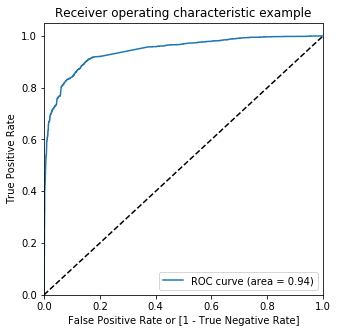

In [81]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [82]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.998456,2835,1,1,1,1,1,1,1,1,1,1,1
1,0,0.004373,3088,0,1,0,0,0,0,0,0,0,0,0
2,1,0.906257,8413,1,1,1,1,1,1,1,1,1,1,1
3,1,0.831182,5015,1,1,1,1,1,1,1,1,1,1,0
4,0,0.138345,5166,0,1,1,0,0,0,0,0,0,0,0


In [83]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384508  1.000000  0.000000
0.1   0.1  0.708010  0.965281  0.547289
0.2   0.2  0.867588  0.909568  0.841362
0.3   0.3  0.872245  0.876463  0.869609
0.4   0.4  0.877212  0.842148  0.899117
0.5   0.5  0.886215  0.809851  0.933922
0.6   0.6  0.871779  0.728300  0.961412
0.7   0.7  0.870071  0.704481  0.973518
0.8   0.8  0.861844  0.668954  0.982346
0.9   0.9  0.835765  0.587808  0.990668


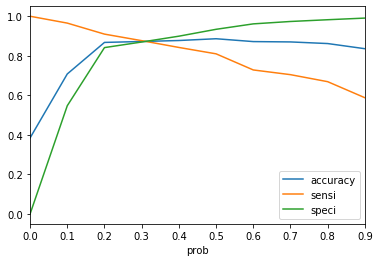

In [84]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [85]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,1,0.998456,2835,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.004373,3088,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.906257,8413,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.831182,5015,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.138345,5166,0,1,1,0,0,0,0,0,0,0,0,0


In [86]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.8722446445203353

In [87]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted )
confusion2

array([[3448,  517],
       [ 306, 2171]], dtype=int64)

In [88]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [89]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8764634638675818

In [90]:
# Let us calculate specificity
TN / float(TN+FP)

0.869609079445145

In [91]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.130390920554855


In [92]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8076636904761905


In [93]:
# Negative predictive value
print (TN / float(TN+ FN))

0.91848694725626


### Precision and Recall

Looking at the confusion matrix again

In [94]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3703,  262],
       [ 471, 2006]], dtype=int64)

##### Precision
TP / TP + FP

In [95]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8844797178130511

##### Recall
TP / TP + FN

In [96]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8098506257569641

### Using sklearn utilities for the same

In [97]:
from sklearn.metrics import precision_score, recall_score

In [98]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8844797178130511

In [99]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8098506257569641

### Precision and recall tradeoff

In [100]:
from sklearn.metrics import precision_recall_curve

In [101]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       1
 3       1
 4       0
        ..
 6437    0
 6438    1
 6439    1
 6440    0
 6441    1
 Name: Converted, Length: 6442, dtype: int64, 0       1
 1       0
 2       1
 3       1
 4       0
        ..
 6437    0
 6438    1
 6439    1
 6440    0
 6441    1
 Name: Predicted, Length: 6442, dtype: int64)

In [102]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

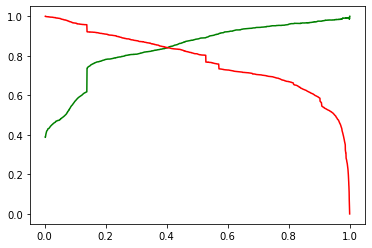

In [103]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [ ]:
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [104]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Do Not Email_Yes,Occupation_Working Professional,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_SMS Sent
76,595,0,1,0,0,0,1,0,0,1,0
5304,1379,0,1,0,0,0,0,0,0,1,1
2092,422,0,1,0,0,0,0,0,0,0,0
582,1152,0,1,0,0,0,0,0,0,1,0
93,838,0,1,0,0,0,0,0,0,0,0


In [105]:
X_test_sm = sm.add_constant(X_test)

C:\Users\Mohit\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Making predictions on the test set

In [106]:
y_test_pred = res.predict(X_test_sm)

In [107]:
y_test_pred[:10]

76      1.000000
5304    1.000000
2092    1.000000
582     1.000000
93      1.000000
5170    1.000000
3500    1.000000
7103    0.024453
7366    0.286715
1023    1.000000
dtype: float64

In [108]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [109]:
# Let's see the head
y_pred_1.head()

,0
76,1.0
5304,1.0
2092,1.0
582,1.0
93,1.0


In [110]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [111]:
# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index

In [112]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [113]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [114]:
y_pred_final.head()

,Converted,LeadID,0
0,1,76,1.0
1,1,5304,1.0
2,0,2092,1.0
3,1,582,1.0
4,0,93,1.0


In [115]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [116]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['LeadID','Converted','Converted_Prob'], axis=1)

AttributeError: 'DataFrame' object has no attribute 'reindex_axis'

In [117]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,LeadID,Converted_Prob
0,1,76,1.0
1,1,5304,1.0
2,0,2092,1.0
3,1,582,1.0
4,0,93,1.0


In [118]:
y_pred_final['Final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [119]:
y_pred_final.head()

,Converted,LeadID,Converted_Prob,Final_Predicted
0,1,76,1.0,1
1,1,5304,1.0,1
2,0,2092,1.0,1
3,1,582,1.0,1
4,0,93,1.0,1


In [122]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.5086893555394641